In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Classified Data',index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_feature=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [9]:
X=pd.DataFrame(scaled_feature,columns=df.columns[:-1])

In [10]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [11]:
Y=df['TARGET CLASS']

In [12]:
Y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
classifier=KNeighborsClassifier(n_neighbors=3)

In [17]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
ypred=classifier.predict(x_test)

In [19]:
check=pd.Series([False,False,False,False,False,False,False,False,True,True])

In [20]:
np.mean(check)# TrueValues%TotalValues

0.2

In [21]:
y_test.head()

274    1
866    0
373    1
221    1
794    1
Name: TARGET CLASS, dtype: int64

In [22]:
np.mean(y_test != ypred)

0.08333333333333333

In [23]:
type(y_test)

pandas.core.series.Series

In [24]:
type(ypred)

numpy.ndarray

In [25]:
error_rate=[]
for i in range(1,71):
    classifier=KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train,y_train)
    ypred=classifier.predict(x_test)
    error_rate.append(np.mean(y_test!=ypred))

In [26]:
error_rate

[0.10333333333333333,
 0.12666666666666668,
 0.08333333333333333,
 0.08,
 0.08666666666666667,
 0.08333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07666666666666666,
 0.07333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08,
 0.08,
 0.07666666666666666,
 0.07333333333333333,
 0.06666666666666667,
 0.07666666666666666,
 0.07333333333333333,
 0.07333333333333333,
 0.08,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.08,
 0.07666666666666666,
 0.07333333333333333,
 0.08,
 0.07,
 0.07666666666666666,
 0.07,
 0.07333333333333333,
 0.07333333333333333,
 0.08,
 0.08,
 0.07666666666666666,
 0.07333333333333333,
 0.08,
 0.07333333333333333,
 0.08,
 0.07333333333333333,
 0.07,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.08666666666666667,
 0.07666666666666666,
 0.08,
 0.08333333333333333,
 0.08666666666666667,


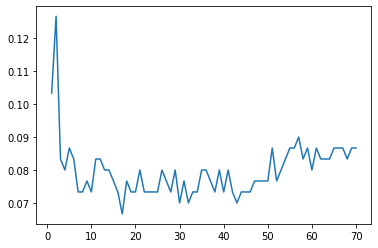

In [27]:
plt.plot(range(1,71),error_rate)

In [28]:
classifier=KNeighborsClassifier(n_neighbors=32)
classifier.fit(x_train,y_train)
ypred=classifier.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)

cm

In [31]:
cm

array([[141,   9],
       [ 12, 138]], dtype=int64)

In [32]:
(141+138)/(141+138+9+12)

0.93